# 1 Algorithms -  Generate Random Values
## 1.1 Метод фон Неймана

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cm = plt.cm.get_cmap('RdYlBu_r')

def get_values(result,bins=25):
    Y, X = np.histogram(result,bins)
    x_span = X.max() - X.min()
    C = [ cm(((x-X.min())/x_span)) for x in X]
    mean, var = np.mean(result), np.var(result)
    return C, mean, var, Y, X, np.array(result)

def generateFonNeyman(R0: int = 25, amount = 100):
    points = []
    iterate = 0
    n = len(str(R0))
    if R0 % 2 == False:
        while R0 != 0 and iterate != amount:
            square = str(R0**2)
            int_digits = "".join(['0' for _ in range( 2 * n - len(square))]) + square
            mean = int_digits[n // 2 : - n // 2]
            R0 = int(mean)
            points.append(float('0.' + mean))
            iterate +=1
        return points
    else:
        print ('Введите чётное число')

In [2]:
C, mean, var, Y, X, result  = get_values(generateFonNeyman(R0 = 11348686, amount = 10000),bins=20)

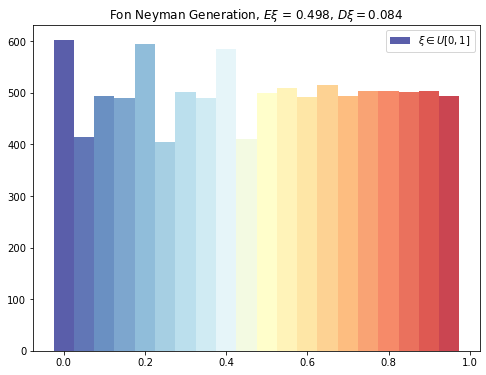

In [3]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.bar(X[:-1],Y, label = r'$\xi \in U[0,1]$', color = C, width=X[1]-X[0], alpha=0.8)
ax.legend()
ax.set_title(fr'Fon Neyman Generation, $E\xi$ = {mean:.3}, $D\xi = {var:.2}$ ')
plt.show()

## 1.2 Метод серединных произведений

In [4]:
def generateMultiplyMethod(R0: int = 333333, R1: int = 333322, amount: int = 10000):
    points = []
    iterate = 0
    n = len(str(R0))
    for i in range(amount):
        square = str(R0*R1)
        int_digits = "".join(['0' for _ in range( 2 * n - len(square))]) + square
        R0 = R1
        mean = int_digits[n // 2 : - n // 2]
        R1 = int(mean)
        points.append(float('0.' + mean))
    return points

In [5]:
C, mean, var, Y, X, result = get_values(generateMultiplyMethod(amount=10000),bins=20)

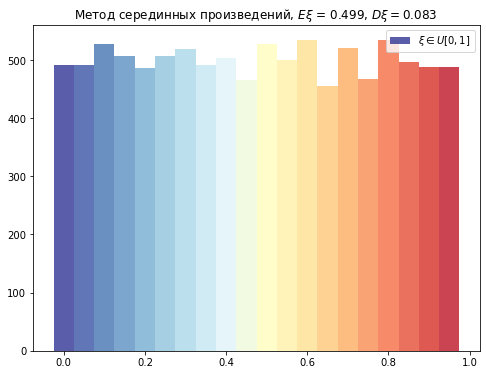

In [6]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.bar(X[:-1],Y, label = r'$\xi \in U[0,1]$', color = C, width=X[1]-X[0], alpha=0.8)
ax.legend()
ax.set_title(fr'Метод серединных произведений, $E\xi$ = {mean:.3}, $D\xi = {var:.2}$ ')
plt.show()

## 1.3 Линейный конгруэтный метод

In [7]:
def generateCongruentialMethod(points = [], k=106, b = 1283, M = 6075, R0 = 1, amount = 10000):
    points = []
    for _ in range(amount):
        R0 = (k*R0+b) % M
        points.append(R0 / M)
        
    return points

coef = pd.read_json("data/data.json", orient = 'split')
coef.head()

,k,b,M
0,106,1283,6075
1,211,1663,7875
2,421,1663,7875
3,430,2531,11979
4,936,1399,6655


In [8]:
choose_coef = coef.iloc[0].to_dict()
C, mean, var, Y, X, result = get_values(generateCongruentialMethod(**choose_coef ,amount=10000),bins = 20)

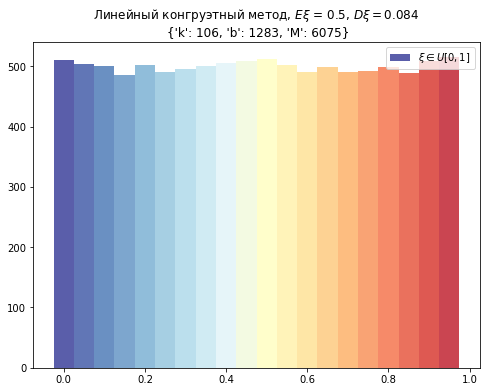

In [9]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.bar(X[:-1],Y, label = r'$\xi \in U[0,1]$', color = C, width=X[1]-X[0], alpha=0.8)
ax.legend()
ax.set_title(fr'Линейный конгруэтный метод, $E\xi$ = {mean:.3}, $D\xi = {var:.2}$' + f'\n {choose_coef}')
plt.show()

## 2. Моделирование нормально распределённых величин

## 2.1 Преобразование Бокса-Мюллера

In [10]:
choose_coef = coef.iloc[0].to_dict()
C, mean, var, Y, X, result = get_values(generateCongruentialMethod(**choose_coef ,amount=10000),bins = 20)

In [11]:
choose_coef = coef.iloc[20].to_dict()
C, mean, var, Y, X, result2 = get_values(generateCongruentialMethod(**choose_coef ,amount=10000),bins = 20)

In [12]:
z1 = np.cos(2*np.pi*np.array(result))*np.sqrt(-2*np.log(np.array(result2)))
z2 = np.sin(2*np.pi*np.array(result))*np.sqrt(-2*np.log(np.array(result2)))

In [13]:
C1, mean, var, Y1, X1, result_normal = get_values(z1,bins = 20)
C2, mean, var, Y2, X2, result_normal2 = get_values(z2,bins = 20)

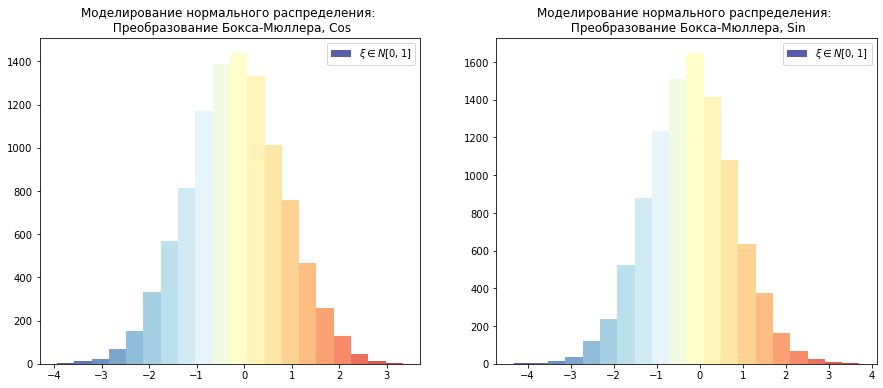

In [14]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
ax[0].bar(X1[:-1],Y1, label = r'$\xi \in N[0,1]$', color = C1, width=X1[1]-X1[0], alpha=0.8)
ax[0].legend()
ax[0].set_title('Моделирование нормального распределения: \n Преобразование Бокса-Мюллера, Cos')
ax[1].bar(X2[:-1],Y2, label = r'$\xi \in N[0,1]$', color = C2, width=X2[1]-X2[0], alpha=0.8)
ax[1].legend()
ax[1].set_title('Моделирование нормального распределения: \n Преобразование Бокса-Мюллера, Sin')
plt.show()

## 2.2 Центральная предельная теорема

In [15]:
 def batch_generator(X, batch_size=1):
        '''
        returns random batch
        '''
        np.random.seed(10)
        for i in range(batch_size):
            perm = np.random.permutation(len(X))
            idxs = perm[:batch_size]
            yield X[idxs]

In [16]:
p = []
batch_size = 6000
generator = batch_generator(np.array(result), batch_size)
for i in range(batch_size):
    x = next(generator)
    u = (np.sum(np.array(x)) - batch_size / 2) * np.sqrt(12 / batch_size)
    p.append(u)

In [17]:
C3, mean3, var3, Y3, X3, result_normal3 = get_values(p,bins = 20)

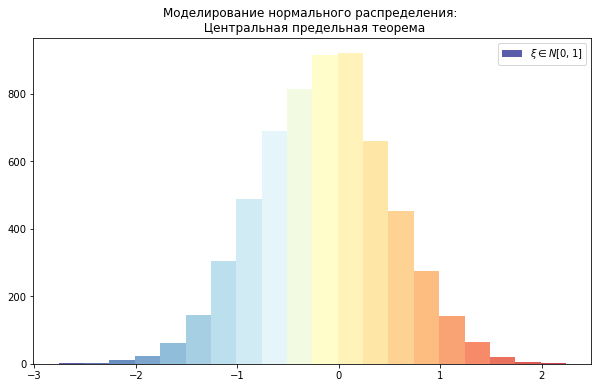

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.bar(X3[:-1],Y3, label = r'$\xi \in N[0,1]$', color = C3, width=X3[1]-X3[0], alpha=0.8)
ax.legend()
ax.set_title('Моделирование нормального распределения: \n Центральная предельная теорема')
plt.show()

# 3 Monte-Carlo Method

## 3.1 Integrate Monte Carlo

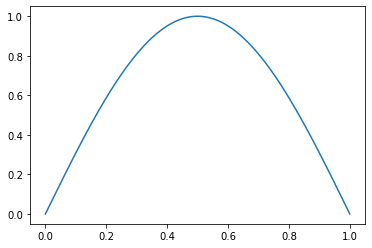

In [19]:
def f(x):
    return np.sin(np.pi * x)

x100 = np.linspace(0, 1, 1000)
plt.plot(x100, f(x100))
plt.show()

In [20]:
def MonteCarlo(res1,res2,x1 = 0 , x2 = 1, c1 = 0 , c2 = 1):
    assert len(res1) == len(res2)
    chat = []
    N1 = 0 #общее число точек
    N2 = 0 #количество точек под интегралом
    for rnd1, rnd2 in zip(res1,res2):
        r1 = x1 + (x2-x1)*rnd1
        r2 = c1 + (c2-c1)*rnd2
        if f(r1) >= r2: #если внутри области фигуры, то добавляем точку в оба множества
            N1 +=1 
            N2 +=1
        else: #если точка только в прямоугольнике, то добавляем в первое множество
            N1 +=1
        chat.append(N2/N1)
            
    return (x2-x1)*(c2-c1)* N2 / N1, chat

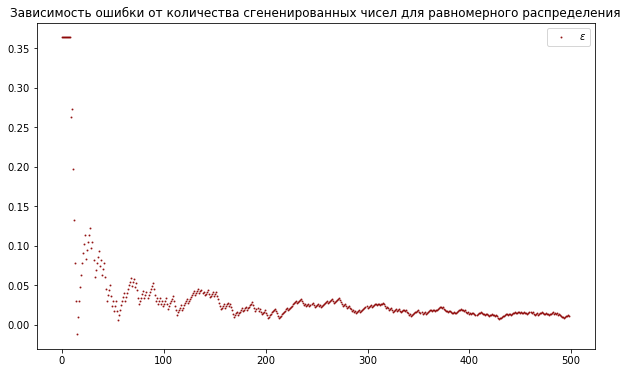

In [21]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

ideal = 0.63662
number = 500
eps = []
ce = []
for number in range(1, number):
    res1 = generateCongruentialMethod(**coef.iloc[0].to_dict() ,amount=number)
    res2 = generateCongruentialMethod(**coef.iloc[20].to_dict() ,amount=number)
    res3, chat = MonteCarlo(res1,res2)
    ce.append(chat)
    
    eps.append(res3-ideal)
    
x_span = X.max() - X.min()
C = [cm(((x-X.min())/x_span)) for x in X]
    
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.scatter(range(0, number), eps, label = r'$\varepsilon$',alpha=0.8,s=1,color = 'darkred')
ax.legend()
ax.set_title('Зависимость ошибки от количества сгененированных чисел для равномерного распределения')
plt.show()

In [22]:
import itertools
ideal = 0.63662
iterations = 500
list1 = range(1,5)
list2 = range(10,15)
all_permutations = list(itertools.product(list1, list2))
plots = []
for number in range(1, iterations):
    for x,y in all_permutations:
        res1 = generateCongruentialMethod(**coef.iloc[x].to_dict() ,amount=number)
        res2 = generateCongruentialMethod(**coef.iloc[y].to_dict() ,amount=number)
        res3, chat = MonteCarlo(res1,res2)
        plots.append(np.array(chat))

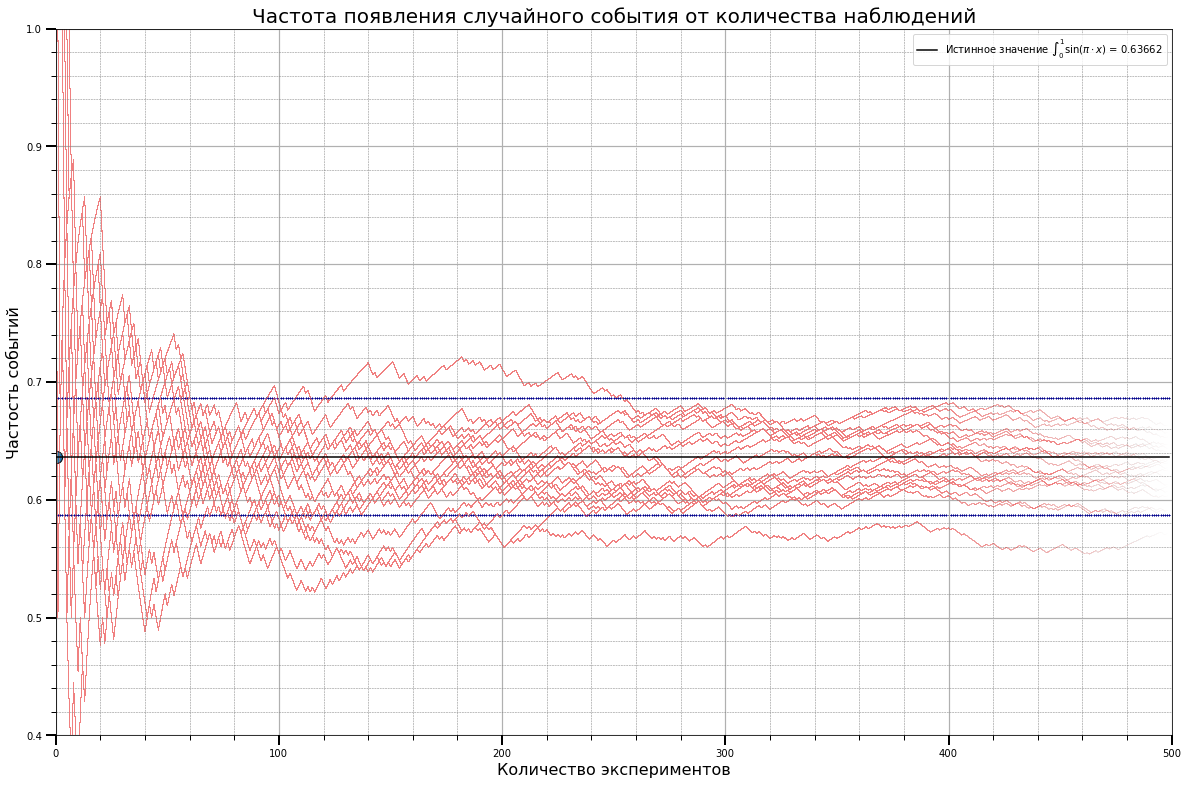

In [23]:
x = [ideal for x in range(0,iterations)]
xplus = np.array(x) + 0.05
xminus= np.array(x) - 0.05

fig, ax = plt.subplots(1,1,figsize=(20,13))
for i in plots:
    ax.plot(i,color='lightcoral', linewidth=0.01)
    plt.xlim([0,iterations])
    plt.ylim([0.4,1])

ax.plot(x,color = 'black',label = fr'Истинное значение $\int_0^1 \sin (\pi \cdot x)$ = {ideal}')
ax.scatter([0],[ideal],marker = 'o', s=150,edgecolor = 'k')
ax.scatter(range(0,iterations), xplus,marker = 'x',s=1,color = 'darkblue')
ax.scatter(range(0,iterations), xminus,marker = 'x',s=1,color = 'darkblue')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.tick_params(which='major', length=10, width=2)
ax.tick_params(which='minor', length=5, width=1)

ax.set_title('Частота появления случайного события от количества наблюдений',fontsize = 20)
ax.set_xlabel('Количество экспериментов',fontsize = 16)
ax.set_ylabel('Частость событий',fontsize = 16)
ax.legend()

plt.show()

## 3.3 Классический эксперимент Полиа

In [67]:
def MonteCarloPolia(res1, x1 = 0 , x2 = 1):
    chat = []
    N1 = 1 #белых точек
    N2 = 1 #черных точек
    for rnd1 in res1:
        r1 = x1 + (x2-x1)*rnd1
        if r1 > 0.5: 
            N1 +=1 
        else: 
            N2 +=1
        chat.append(N1/(N1+N2))
            
    return (x2-x1)* N1 / (N1+N2), chat

In [61]:
res1 = generateCongruentialMethod(**coef.iloc[0].to_dict() ,amount=100)

In [62]:
resCarloPiola, paradox = MonteCarloPolia(res1)

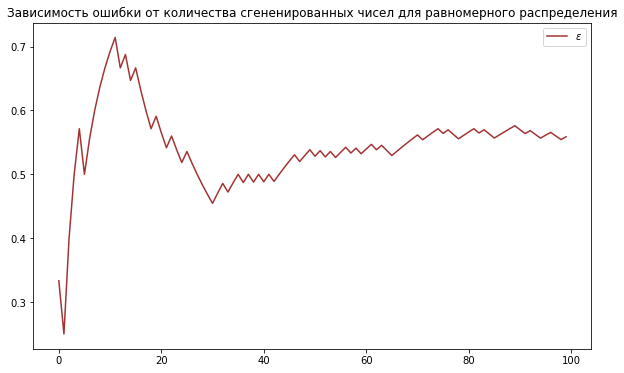

In [63]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(paradox, label = r'$\varepsilon$',alpha=0.8,color = 'darkred')
ax.legend()
ax.set_title('Зависимость ошибки от количества сгененированных чисел для равномерного распределения')
plt.show()

In [64]:
import itertools
ideal = 0.5
iterations = 500
list1 = range(1,coef.shape[0]-20)
plots = []
for number in range(1, iterations,10):
    for x in list1:
        res1 = generateCongruentialMethod(R0 = x ,amount=number)
        res3, chat = MonteCarloPolia(res1)
        plots.append(np.array(chat))

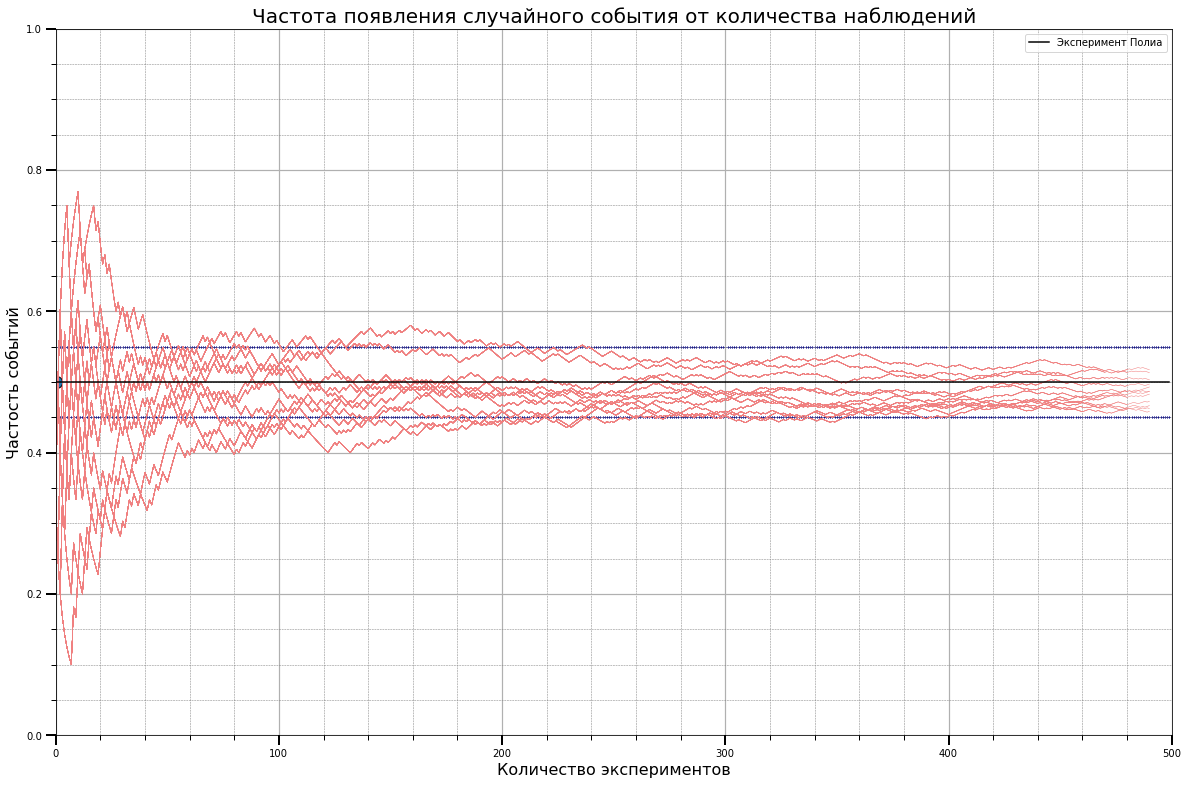

In [66]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

x = [ideal for x in range(0,iterations)]
xplus = np.array(x) + 0.05
xminus= np.array(x) - 0.05

fig, ax = plt.subplots(1,1,figsize=(20,13))
for i in plots:
    ax.plot(i,color='lightcoral', linewidth=0.5)
    plt.xlim([0,iterations])
    plt.ylim([0,1])

ax.plot(x,color = 'black',label = fr'Эксперимент Полиа')
ax.scatter([0],[ideal],marker = 'o', s=150,edgecolor = 'k')
ax.scatter(range(0,iterations), xplus,marker = 'x',s=1,color = 'darkblue')
ax.scatter(range(0,iterations), xminus,marker = 'x',s=1,color = 'darkblue')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.tick_params(which='major', length=10, width=2)
ax.tick_params(which='minor', length=5, width=1)

ax.set_title('Частота появления случайного события от количества наблюдений',fontsize = 20)
ax.set_xlabel('Количество экспериментов',fontsize = 16)
ax.set_ylabel('Частость событий',fontsize = 16)
ax.legend()

plt.show()

In [89]:
import random
def get_cards(n, win, lose):
    data = []
    for i in range(n):
        cashe = 0
        cards = random.sample([0]*18+[1]*18,36)
        q0, q1 = 0, 0
        lose1 = lose
        for i in range(36):
            choice = random.choice([0,1])
            if q0 >= 18 or q1 >=18:
                cashe +=win * (36-i-1)
                break
            if choice == cards[i]:
                cashe +=win
            else:
                cashe -=lose1
                lose1 *=2
            if cards[i]==0:
                q0 +=1
            else:
                q1 +=1
        data.append(cashe)
    return data

np.mean(get_cards(1000,100,1))

-945152.956